In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/nelly/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def convert_to_datetime(x):
    return datetime.fromtimestamp(x)

#preprocess data
def load_aggregate_data(house, channel):
    filename = '../data/' + house + '/' + channel + '.dat'
    agg_df = pd.read_table(filename, sep=' ',header=None,names = ['unix_date','meter_reading'])
    agg_df['date'] = agg_df['unix_date'].map(convert_to_datetime)
    agg_df = agg_df.set_index('date').drop('unix_date', axis = 1)
    agg_df['time'] = agg_df.index.time
    agg_df['day'] = agg_df.index.date
    return agg_df

# resample data at desired frequency interval and pivot data
def resameple_and_pivot(df,resample_freq):
    avg_df = df.resample(resample_freq).mean()
    avg_df['time'] = avg_df.index.time
    avg_df['day'] = avg_df.index.date
    agg_pivot = avg_df.reset_index().pivot('time','day','meter_reading')
    return avg_df, agg_pivot

In [3]:
house = 'house_1'
channel = 'labels'
filename = '../data/' + house + '/' + channel + '.dat'
h1_labels = pd.read_table(filename, sep=' ',header=None,names = ['unix_date','meter_reading'])
print h1_labels

    unix_date         meter_reading
0           1             aggregate
1           2                boiler
2           3    solar_thermal_pump
3           4                laptop
4           5       washing_machine
5           6            dishwasher
6           7                    tv
7           8        kitchen_lights
8           9                  htpc
9          10                kettle
10         11               toaster
11         12                fridge
12         13             microwave
13         14            lcd_office
14         15           hifi_office
15         16            breadmaker
16         17        amp_livingroom
17         18           adsl_router
18         19     livingroom_s_lamp
19         20        soldering_iron
20         21         gigE_&_USBhub
21         22                hoover
22         23       kitchen_dt_lamp
23         24       bedroom_ds_lamp
24         25      lighting_circuit
25         26    livingroom_s_lamp2
26         27          iPad_

In [4]:
agg_data = load_aggregate_data('house_1', 'channel_1')
agg_data = agg_data['2014-03-01':'2014-05-01'].rename(columns = {'meter_reading':'aggregate'})
agg_data = agg_data.resample('1Min').mean()

for row in h1_labels.values[1:]:
    single_df = load_aggregate_data('house_1', 'channel_'+str(row[0]))
    single_df = single_df['2014-03-01':'2014-05-01'][['meter_reading']].rename(columns = {'meter_reading':row[1]})
    single_df = single_df.resample('1Min').mean()
    agg_data = agg_data.join(single_df, how = 'left')
agg_data.head()

KeyboardInterrupt: 

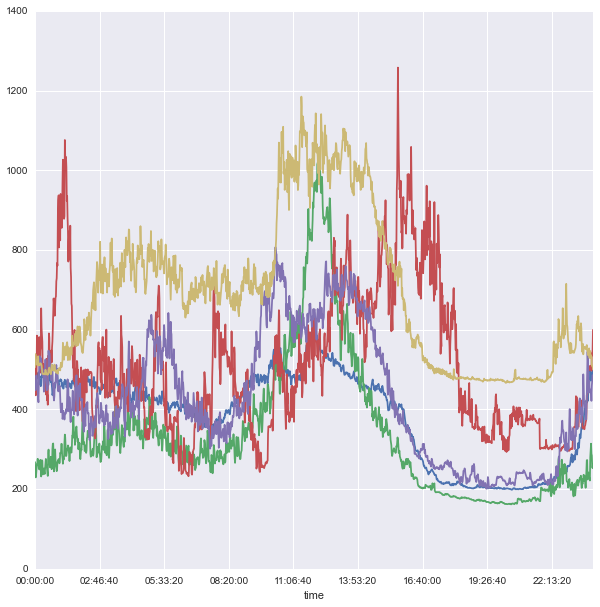

In [126]:
for house in ['house_1', 'house_2','house_3','house_4','house_5']:
    df = load_aggregate_data(house,'channel_1')
    resampled, df_pivot = resameple_and_pivot(df,'1Min')
    agg_avg = df_pivot.mean(axis= 1)
    agg_avg.plot(figsize = (10,10), label = house);

In [127]:
h1_fridge = load_aggregate_data('house_1', 'channel_12')
h1_fridge.head()

,meter_reading,time,day
date,,,
2012-12-14 14:21:32,85,14:21:32,2012-12-14
2012-12-14 14:21:38,85,14:21:38,2012-12-14
2012-12-14 14:21:44,84,14:21:44,2012-12-14
2012-12-14 14:21:50,85,14:21:50,2012-12-14
2012-12-14 14:21:56,85,14:21:56,2012-12-14


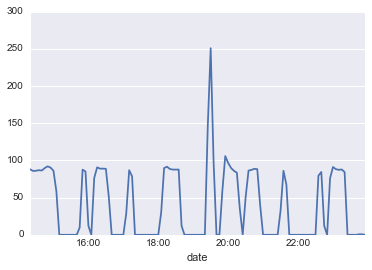

In [130]:
fridge_5min = h1_fridge.resample('5Min').mean()
fridge_1day_5min = fridge_5min['2012-12-14']['meter_reading']
fridge_1day_5min.plot();

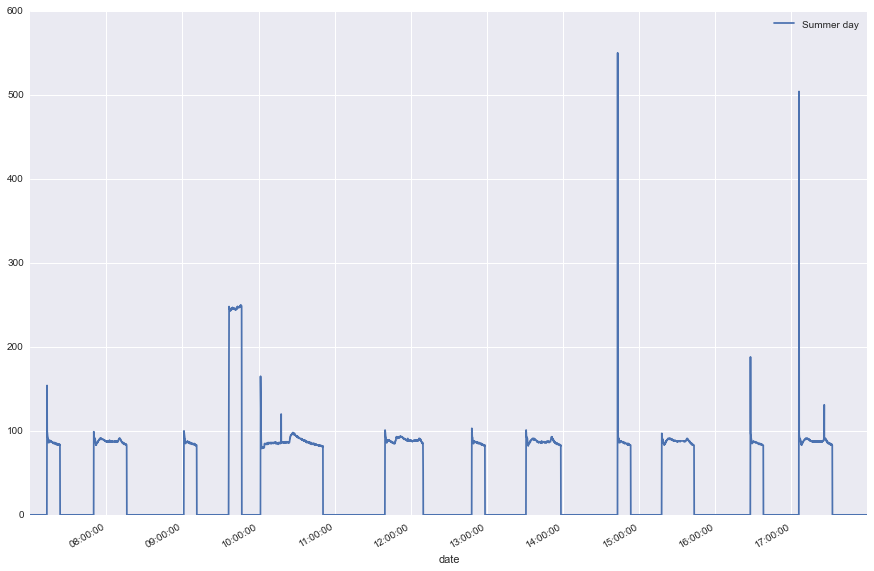

In [131]:
fig = plt.figure(figsize = (15,10))
fridge_07_18 = h1_fridge['2013-06-15 07:00:00':'2013-06-15 17:59:59']['meter_reading']
fridge_07_18.plot(label = 'Summer day')
plt.legend();

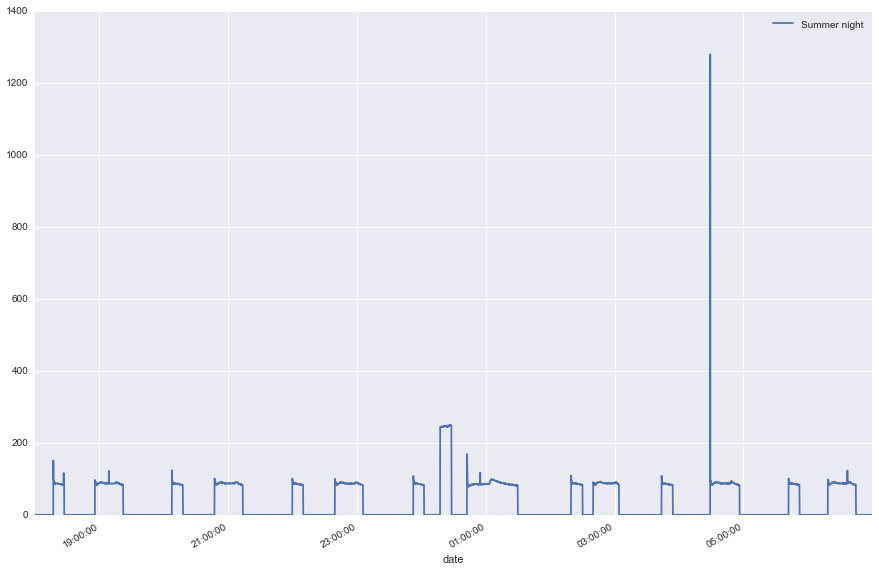

In [133]:
fig = plt.figure(figsize = (15,10))
fridge_18_07 = h1_fridge['2013-06-15 18:00:00':'2013-06-16 06:59:59']['meter_reading']
fridge_18_07.plot(label = 'Summer night')
plt.legend();

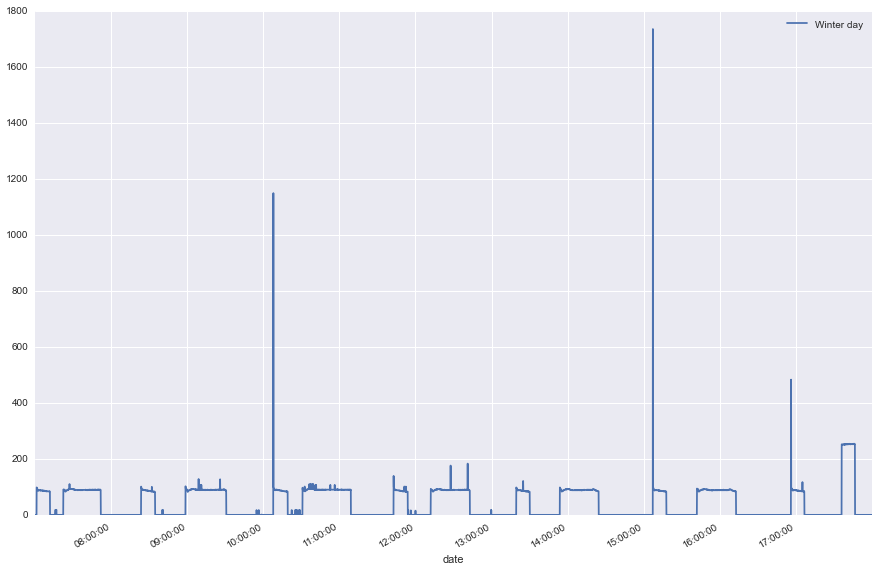

In [135]:
fig = plt.figure(figsize = (15,10))
fridge_07_18 = h1_fridge['2013-12-15 07:00:00':'2013-12-15 17:59:59']['meter_reading']
fridge_07_18.plot(label = 'Winter day')
plt.legend();

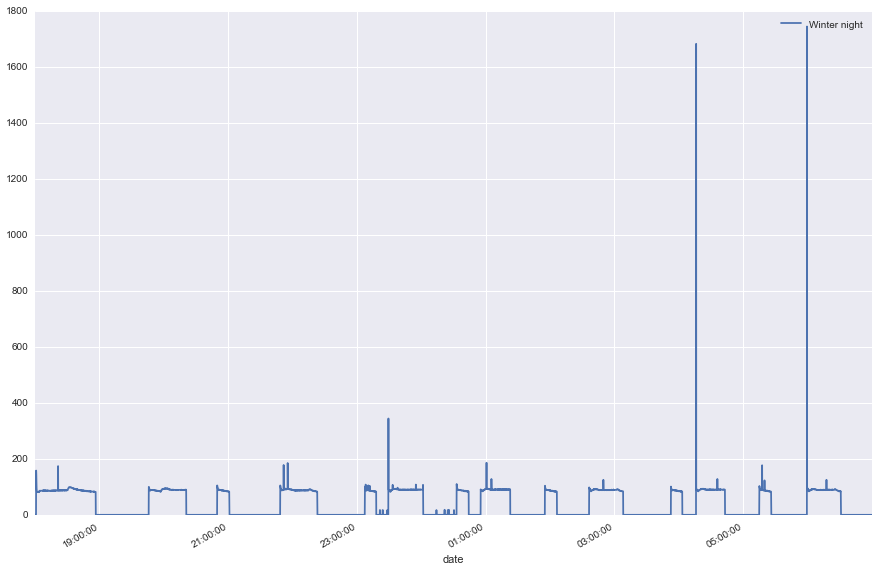

In [137]:
fig = plt.figure(figsize = (15,10))
fridge_18_07 = h1_fridge['2013-12-15 18:00:00':'2013-12-16 06:59:59']['meter_reading']
fridge_18_07.plot(label = 'Winter night')
plt.legend();

In [6]:
h1_washer = load_aggregate_data('house_1', 'channel_6')
h1_washer.head()


,meter_reading,time,day
date,,,
2012-11-09 14:28:18,1,14:28:18,2012-11-09
2012-11-09 14:28:24,1,14:28:24,2012-11-09
2012-11-09 14:28:30,1,14:28:30,2012-11-09
2012-11-09 14:28:36,1,14:28:36,2012-11-09
2012-11-09 14:28:42,1,14:28:42,2012-11-09


In [27]:
import cPickle as pk
with open('/Users/nelly/Galvanize/Capstone/Electricity-load-prediction/data/house_1/4app_test.pkl','r') as f:
    four_app_train = pk.load(f)
four_app_train.head()

,channel_12,channel_12_diff,channel_5,channel_5_diff,channel_7,channel_7_diff,channel_6,channel_6_diff
date,,,,,,,,
2013-08-01 00:00:00,91.777778,NaN,0.0,NaN,1.000000,NaN,0.0,NaN
2013-08-01 00:01:00,91.428571,-0.349206,0.0,0.0,1.000000,0.000000,0.0,0.0
2013-08-01 00:02:00,91.875000,0.446429,0.0,0.0,1.000000,0.000000,0.0,0.0
2013-08-01 00:03:00,92.000000,0.125000,0.0,0.0,1.000000,0.000000,0.0,0.0
2013-08-01 00:04:00,92.000000,0.000000,0.0,0.0,0.888889,-0.111111,0.0,0.0


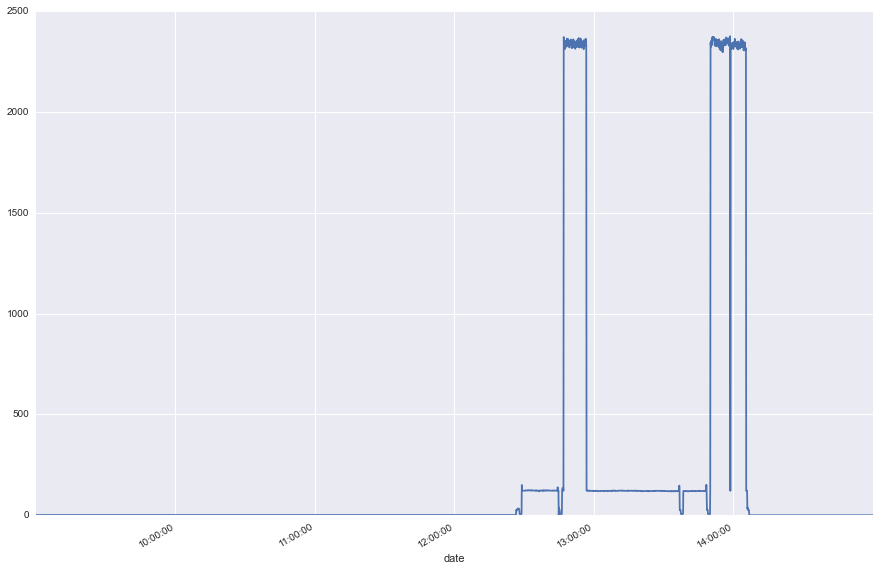

In [11]:
washer_resampled = h1_washer.resample('5Min').mean()

fig = plt.figure(figsize = (15,10))
h1_washer_sub = h1_washer['2013-06-19 09:00:00':'2013-06-19 15:00:00']['meter_reading']
h1_washer_sub.plot()


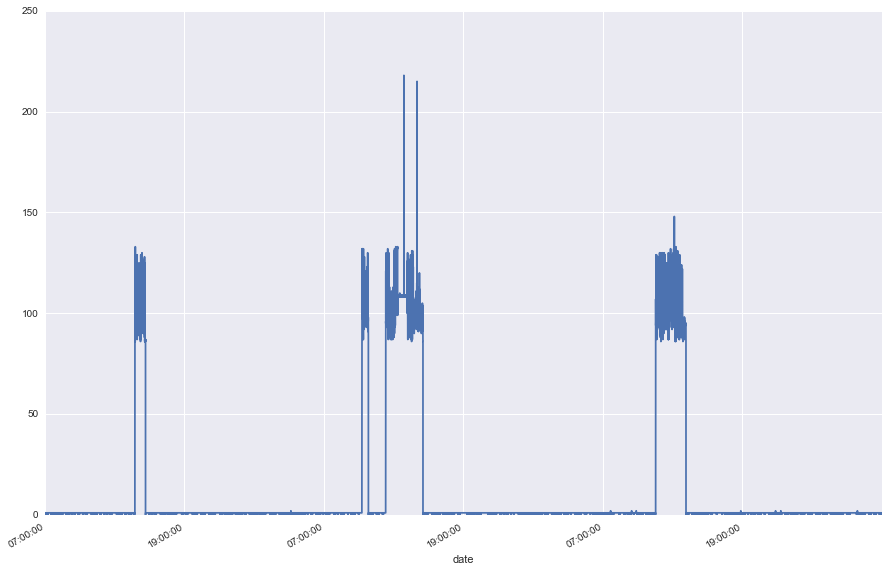

In [13]:
h1_tv = load_aggregate_data('house_1', 'channel_7')
fig = plt.figure(figsize = (15,10))
h1_tv_sub = h1_tv['2013-06-19 07:00:00':'2013-06-22 07:00:00']['meter_reading']
h1_tv_sub.plot()

# Train some HMM's on fridge data

In [138]:
from __future__ import print_function

import datetime

import numpy as np
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator

from hmmlearn.hmm import GaussianHMM

In [148]:
X_train = h1_fridge['2014-06-20':'2014-06-22']['meter_reading'].values.reshape((len(X_train),1))
X_test = h1_fridge['2014-06-23':'2014-06-24']['meter_reading'].values.reshape((len(X_test),1))


In [177]:
print("fitting to HMM and decoding ...", end="")

# Make an HMM instance and execute fit
model = GaussianHMM(n_components=2, covariance_type="diag", n_iter=10000).fit(X_train)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X_test)

print("done")

fitting to HMM and decoding ...done


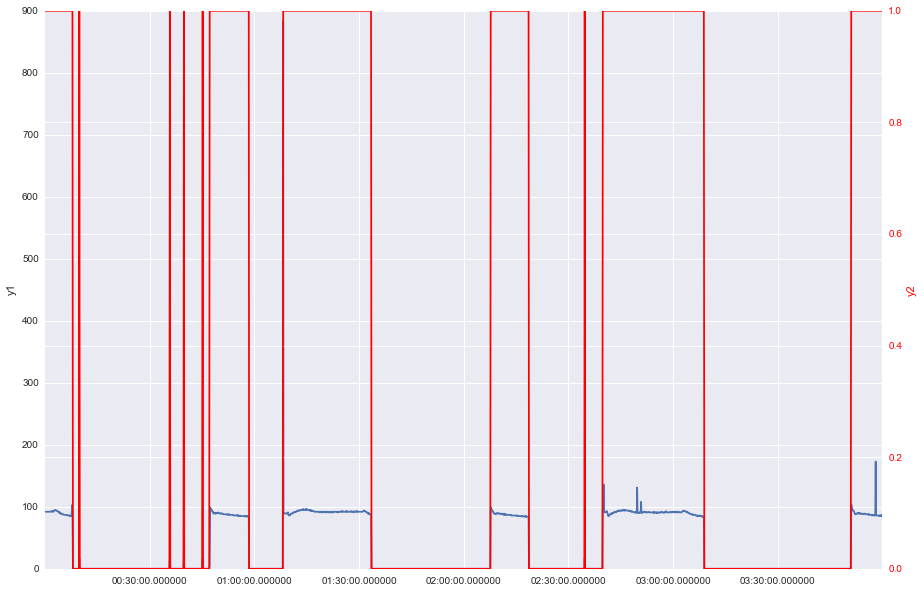

In [180]:
x_axis = h1_fridge['2014-06-23 00:00:00':'2014-06-23 04:00:00'].index[:n_obs]
n_obs = len(x_axis)

fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(111)
ax1.plot(x_axis, X_test[:n_obs])
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x_axis, hidden_states[:n_obs], 'r-')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

In [157]:
print("Transition matrix")
print(model.transmat_)
print()
print(hidden_states)

Transition matrix
[[ 0.99233216  0.00204105  0.00562679]
 [ 0.00488353  0.99005295  0.00506353]
 [ 0.0325917   0.06422206  0.90318624]]

[0 0 0 ..., 1 1 1]


In [ ]:
print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

Means and vars of each hidden state
0th hidden state
mean =  [  2.38627745e-02   4.97390971e+07]
var =  [  7.29371904e-01   2.49469081e+14]

1th hidden state
mean =  [  7.86522470e-03   5.43200042e+07]
var =  [  5.25202891e-02   1.54645465e+14]

2th hidden state
mean =  [ -3.61784193e-01   1.53097389e+08]
var =  [  2.67478808e+00   5.88894802e+15]

3th hidden state
mean =  [  2.17405984e-02   8.82099463e+07]
var =  [  1.24113728e-01   5.64900994e+14]



In [ ]:
fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(dates[mask], close_v[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)

plt.show()